Загрузка необходимых пакетов и тестирование работоспособности
=========

In [4]:
# python 2. Windows 8

# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [6]:
# компоненты для работы с PyMol 

from xmlrpclib import ServerProxy
from IPython.display import Image

Запустили PyMol в режиме RPC сервер (pymol -R в cmd)

In [7]:
cmd = ServerProxy(uri="http://localhost:9123/RPC2")

In [8]:
cmd.fetch('1lmp')

'1lmp'

In [20]:
# контроль за временем
import time
cmd.hide("everything")

In [18]:
# пример формирования картинки

for i in range (1,50):
     cmd.show_as("cartoon",str(i-1)+"+"+str(i)+"+"+str(i+1)+'/CA')
     time.sleep(.1)
     cmd.show_as("ribbon",str(i-1)+"+"+str(i)+"+"+str(i+1)+'/CA')

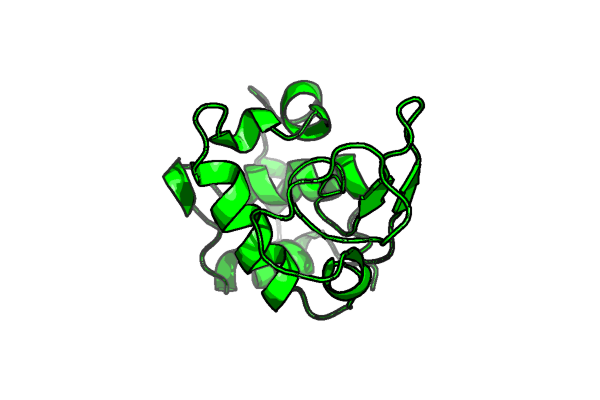

In [20]:
cmd.set("opaque_background", 'off')
cmd.set("ray_trace_mode", '3')
cmd.bg_color('white')
cmd.show_as("cartoon")
cmd.zoom()
cmd.ray(600,400)
cmd.png('/temp/mypng.png')
time.sleep(2)
Image(filename='/temp/mypng.png')

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

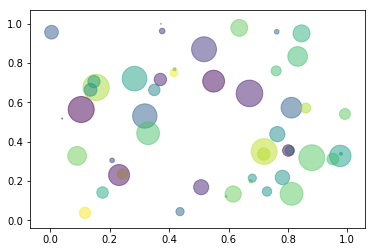

In [20]:
# Пример построения графика

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

Домашняя работа №2 
=========

## Задание 1. Sculpting

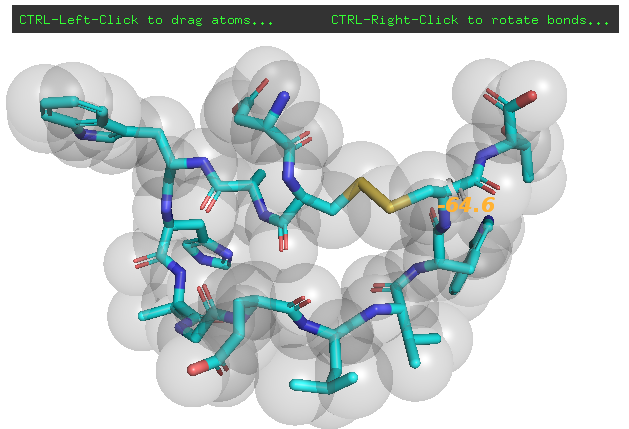

In [18]:
Image(filename=r'C:\Users\Alex\Google Диск\Data analysis in biology and medicine\Структурная биоинформатика\2\Pymol sculpting.png')

In [24]:
# убираем ненужные объекты

cmd.delete('sculpt')

## Задание 2

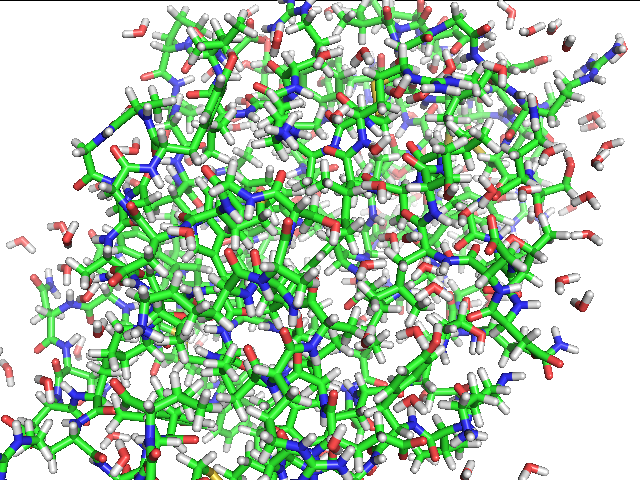

In [28]:
# добавляем водороды и рисуем молекулу
cmd.show_as("sticks")
cmd.h_add('1lmp')
cmd.png('/temp/mypng.png')
time.sleep(2)
Image(filename='/temp/mypng.png')
# водороды отображаюся белым цветом

В записи 1lmp из PDB находим, что для данного белка есть 2 лиганда. 
Скачиваем их в формате .sdf

In [33]:
cmd.load(r'C:\Users\Alex\YandexDisk\Data analysis in biology and medicine\Structural bio\2\Ligands_noHydrogens_withMissing_1_Instances.sdf','lig1')
cmd.load(r'C:\Users\Alex\YandexDisk\Data analysis in biology and medicine\Structural bio\2\Ligands_noHydrogens_withMissing_2_Instances.sdf','lig2')

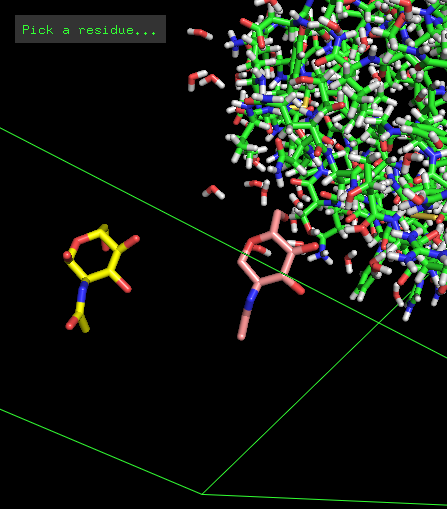

In [34]:
# смотрим на 2 загруженных лиганда

cmd.png('/temp/mypng.png')
time.sleep(2)
Image(filename='/temp/mypng.png')

In [35]:
# выбираем атомы азота и кислорода, которые являются соседями водорода и могут создавать области - доноры
cmd.select('don', '(elem n,o and (neighbor hydro))')

331

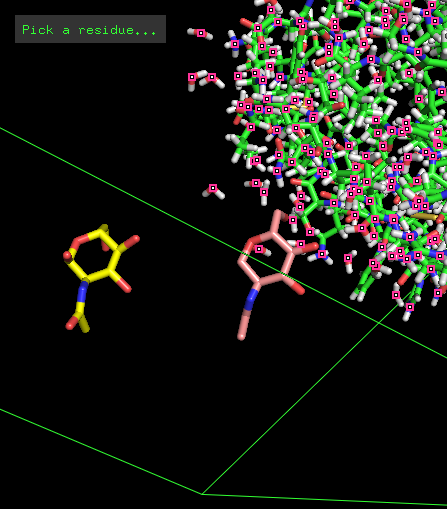

In [36]:
cmd.png('/temp/mypng.png')
time.sleep(2)
Image(filename='/temp/mypng.png')

In [37]:
# выбираем области-акцепторы
cmd.select('acc', '(elem o or (elem n and not (neighbor hydro)))')

351

Далее лиганды 1 и 2 были придвинуты ближе к белку вручную в PyMol.

Проведем поиск всех возможных водородных связей на расстоянии 3.2 ангстрема (cutoff по умолчанию)

In [45]:
cmd.dist('HBA1', '(lig1 and acc)','(1lmp and don)', '3.2')

1.9456665515899658

In [46]:
cmd.dist('HBA2', '(lig2 and acc)','(1lmp and don)', '3.2')

1.1183937788009644

In [47]:
cmd.dist('HBD1', '(lig1 and don)','(1lmp and acc)', '3.2')

0.0

In [48]:
cmd.dist('HBD2', '(lig2 and don)','(1lmp and acc)', '3.2')

0.0

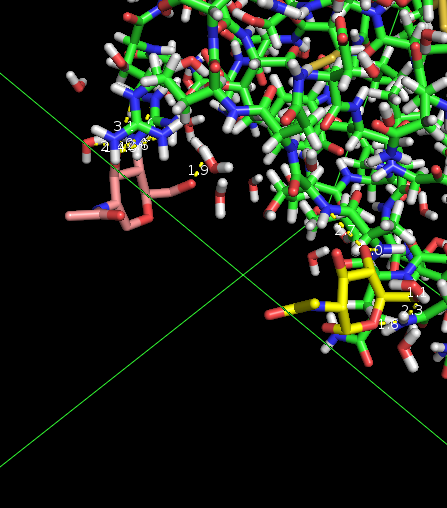

In [49]:
# посмотрим на то, какие связи нашлись
cmd.png('/temp/mypng.png')
time.sleep(2)
Image(filename='/temp/mypng.png')

Чтобы правильно найти водородные связи, которыми лиганд будет связываться с белком, необходимо использовать процедуру докинга лиганда - т.е. найти его оптимальное расположение.

## Задание 3

Находим АК, которая имеет большое количество водородных связей с лигандом.

Выделим ее:

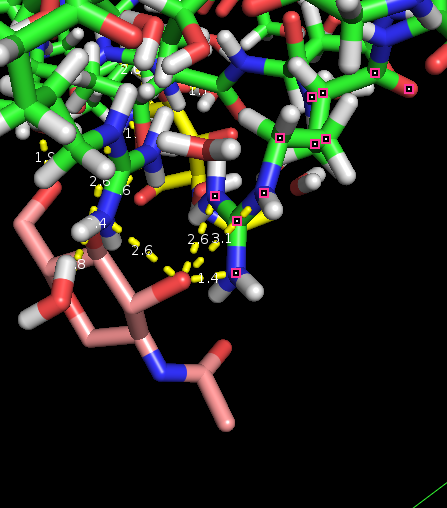

In [50]:
cmd.png('/temp/mypng.png')
time.sleep(2)
Image(filename='/temp/mypng.png')

Кликаем на эту АК в режиме wizard - mutagenesis.

Смотрим:

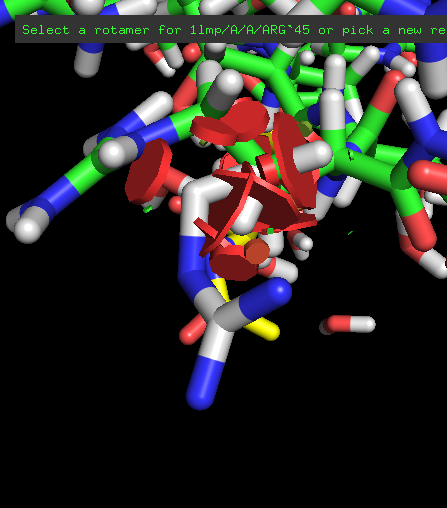

In [51]:
cmd.png('/temp/mypng.png')
time.sleep(2)
Image(filename='/temp/mypng.png')

## Задание 4

In [15]:
# TO DO

## Задание 5

In [21]:
cmd.fetch('1lmp')

'1lmp'

In [22]:
cmd.h_add('1lmp')

In [28]:
cmd.load(r'C:\Users\Alex\YandexDisk\Data analysis in biology and medicine\Structural bio\2\Structure3D_CID_2762604.sdf', 
         'TAMRA')

In [29]:
cmd.show_as("sticks")

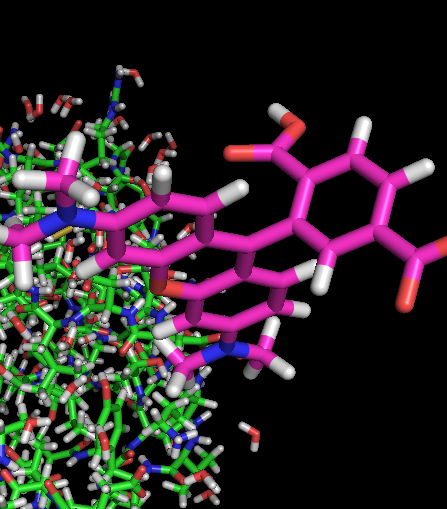

In [30]:
cmd.png('/temp/mypng.png')
time.sleep(2)
Image(filename='/temp/mypng.png')

Выбираем карбоксильную группу на метке TAMRA вручную по атомам. Переименовываем ее в 'cooh'. <br />
Удаляем в ней OH:

_>Pymol_

remove (oh)

Находим в 1lmp АК с группой OH, торчащую наружу - выбираем серин.

_>Pymol_

select target, byres resn SER near_to 50 of cooh

Мышкой пододвигаем TAMRA к серину на 1lmp и разворачиваем ее так, чтобы остаток CO располагался напротив серина. На картинке выделен серин.

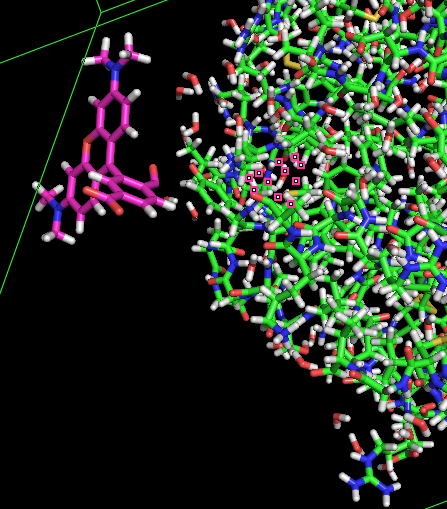

In [31]:
cmd.png('/temp/mypng.png')
time.sleep(2)
Image(filename='/temp/mypng.png')

_>Pymol_

fuse cooh, target, mode=1

## Задание 6

In [21]:
default_image = 'pymolimg.png'
def prepareImage(width=300, height=300, filename=default_image, sleep=2):
    cmd.ray(width, height)
    cmd.png(filename)
    time.sleep(sleep)

def focus(x):
    cmd.center(x)
    cmd.zoom(x)

In [22]:
cmd.reinitialize()
cmd.bg_colour('white')

aa  = 'ALA'
ala_phi = '-50'
ala_psi = '-40'
kol = 100

def polyAA(n, aa, phi, psi):
    cmd.fragment(aa)

    for i in range(2, n+1):
        cmd.edit("i. %i & n. C" % i)
        cmd.do('editor.attach_amino_acid("pk1", "%s")' % aa)

    for i in range(2, n+1):
        cmd.set_dihedral("i. %i & n. N" % i, "i. %i & n. CA" % i,
                         "i. %i & n. C" % i, "i. %i & n.  N" % (i+1), phi)
        cmd.set_dihedral("i. %i & n.  C" % i,"i. %i & n. N" % (i+1),
                         "i. %i & n. CA" % (i+1), "i. %i & n. C" % (i+1), psi)

    cmd.edit()
    cmd.show('cartoon', aa)
    focus(aa)

polyAA(kol, aa, ala_phi, ala_psi)
    
prepareImage(width=1000, height=300,sleep = 0)
Image(default_image)